In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#reading the required data
Data = pd.read_csv('Data.csv')

#understanding the given data

In [ ]:
Data.head()

,F1,F2,F3,F4,F5,Unnamed: 5
0,0.02,0.33,0.36,0.76,0.1,NaN
1,0.04,0.28,0.55,0.25,0.1,NaN
2,0.05,0.07,0.7,0.01,0.05,NaN
3,0.05,0.05,0.55,0.6,0.14,NaN
4,0.05,0.29,0.58,0.14,0.32,NaN


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   F1          402 non-null    object 
 1   F2          401 non-null    object 
 2   F3          402 non-null    object 
 3   F4          402 non-null    object 
 4   F5          402 non-null    object 
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 19.0+ KB


In [ ]:
Data.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'Unnamed: 5'], dtype='object')

In [ ]:
#dropped the unrequired column unnamned
Data.drop(['Unnamed: 5'] , axis=1 , inplace=True)

In [ ]:
#converting the given data into dataframe
df = pd.DataFrame(Data)

In [ ]:
df.head()

,F1,F2,F3,F4,F5
0,0.02,0.33,0.36,0.76,0.1
1,0.04,0.28,0.55,0.25,0.1
2,0.05,0.07,0.7,0.01,0.05
3,0.05,0.05,0.55,0.6,0.14
4,0.05,0.29,0.58,0.14,0.32


In [ ]:
#adding new columns which are the replica of given columns but filled with Nan for non-numeric type(ex:strings,0)
for col in df.columns:
    df[col + ' filter'] = pd.to_numeric(df[col], errors='coerce')

df

,F1,F2,F3,F4,F5,F1 filter,F2 filter,F3 filter,F4 filter,F5 filter
0,0.02,0.33,0.36,0.76,0.1,0.02,0.33,0.36,0.76,0.10
1,0.04,0.28,0.55,0.25,0.1,0.04,0.28,0.55,0.25,0.10
2,0.05,0.07,0.7,0.01,0.05,0.05,0.07,0.70,0.01,0.05
3,0.05,0.05,0.55,0.6,0.14,0.05,0.05,0.55,0.60,0.14
4,0.05,0.29,0.58,0.14,0.32,0.05,0.29,0.58,0.14,0.32
...,...,...,...,...,...,...,...,...,...,...
397,10,0.49,30,0.7,0.69,10.00,0.49,30.00,0.70,0.69
398,Zero,0,0.5,0.2,0.85,NaN,0.00,0.50,0.20,0.85
399,Zero,0.1,0.5,0.26,0.05,NaN,0.10,0.50,0.26,0.05
400,Zero,0.25,0.5,0.09,0.07,NaN,0.25,0.50,0.09,0.07


#understanding where non-numeric type are present in the all the columns

In [ ]:
df[df['F1 filter'].isnull()]

,F1,F2,F3,F4,F5,F1 filter,F2 filter,F3 filter,F4 filter,F5 filter
398,Zero,0,0.5,0.2,0.85,NaN,0.00,0.50,0.20,0.85
399,Zero,0.1,0.5,0.26,0.05,NaN,0.10,0.50,0.26,0.05
400,Zero,0.25,0.5,0.09,0.07,NaN,0.25,0.50,0.09,0.07
401,Zero,0.62,0.52,0.26,0.07,NaN,0.62,0.52,0.26,0.07


In [ ]:
df[df['F2 filter'].isnull()]

,F1,F2,F3,F4,F5,F1 filter,F2 filter,F3 filter,F4 filter,F5 filter
126,0.25,Zero,0.1,0.12,0.37,0.25,NaN,0.10,0.12,0.37
396,0.91,NaN,0.26,0.89,0.88,0.91,NaN,0.26,0.89,0.88


In [ ]:
df[df['F3 filter'].isnull()]

,F1,F2,F3,F4,F5,F1 filter,F2 filter,F3 filter,F4 filter,F5 filter
395,0.9,0.78,Null,0.32,0.89,0.9,0.78,NaN,0.32,0.89


In [ ]:
df[df['F4 filter'].isnull()]

,F1,F2,F3,F4,F5,F1 filter,F2 filter,F3 filter,F4 filter,F5 filter
40,0.1,0.33,0.02,Zero,0.25,0.1,0.33,0.02,NaN,0.25


In [ ]:
df[df['F5 filter'].isnull()]

,F1,F2,F3,F4,F5,F1 filter,F2 filter,F3 filter,F4 filter,F5 filter
22,0.09,0.33,0.31,0.26,Zero,0.09,0.33,0.31,0.26,NaN


In [ ]:
#new dataframe with cleaned data
df2 = df.drop(['F1','F2','F3','F4','F5'],axis=1)

In [ ]:
# solution for F1 filter, F4 filter and F5 filter
for col in df2.columns:
    if all(df[df[col].isnull()][col[:2]] == 'Zero'):
        df2[col] = df2[col].fillna(0)

# solution for F2 filter
df2['F2 filter'][126] = 0
df2['F2 filter'][396] = df['F2 filter'].mean()

# solution for F3 filter
df2['F3 filter'][395] = df['F3 filter'].mean()

df2.info()
#this results in proper cleaned data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   F1 filter  402 non-null    float64
 1   F2 filter  402 non-null    float64
 2   F3 filter  402 non-null    float64
 3   F4 filter  402 non-null    float64
 4   F5 filter  402 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB


In [ ]:
df2.describe()

,F1 filter,F2 filter,F3 filter,F4 filter,F5 filter
count,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.376433,0.356272,0.533030,0.432415,0.457495
std,0.524664,0.214774,1.493584,0.256962,0.266131
min,0.000000,0.000000,0.010000,0.000000,0.000000
25%,0.200000,0.200000,0.272500,0.250000,0.250000
50%,0.302500,0.300000,0.450000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,10.000000,0.900000,30.000000,0.990000,0.990000


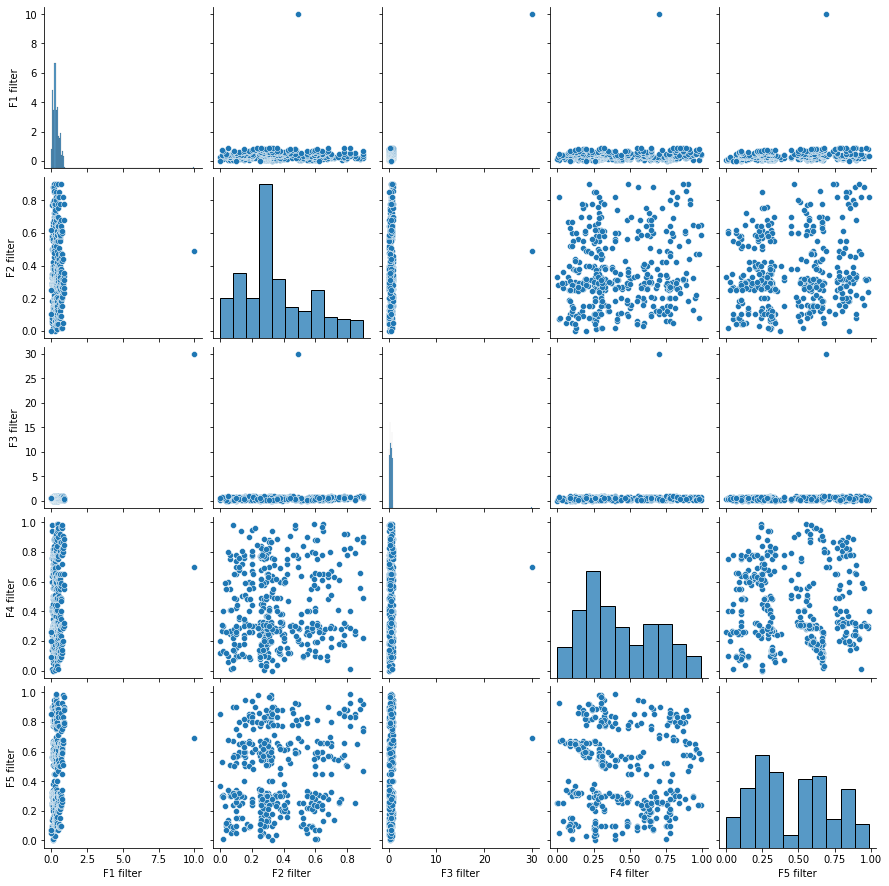

In [ ]:
#plotting pairplot and understanding the relationship between all the columnsbb
plot = df2[df2.columns]
sns.pairplot(plot)

#from plots i can say that there are significant outliers in F1 and F3 filter columns.So lets plot relplot and understand the behaviour of data.

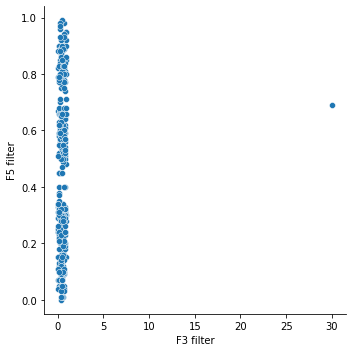

In [ ]:
sns.relplot(data=df2, x="F3 filter", y="F5 filter")

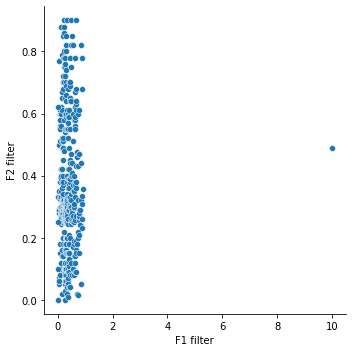

In [ ]:
sns.relplot(data=df2, x="F1 filter", y="F2 filter")

In [ ]:
df2[df2['F1 filter'] > 8]

,F1 filter,F2 filter,F3 filter,F4 filter,F5 filter
397,10.0,0.49,30.0,0.7,0.69


In [ ]:
# outlier
df2[df2['F3 filter'] > 10]

,F1 filter,F2 filter,F3 filter,F4 filter,F5 filter
397,10.0,0.49,30.0,0.7,0.69


#we can see that the outlier points are present in the same row.

In [ ]:
#dropping the outlier row
df2.drop(397, inplace=True)

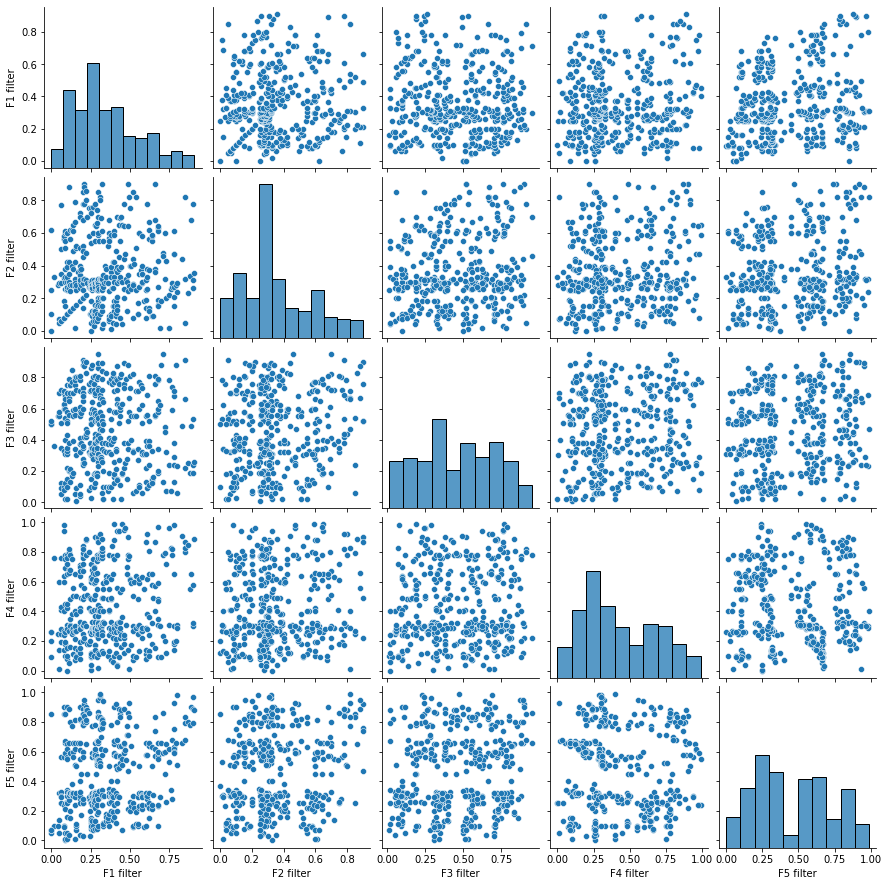

In [ ]:
#plotting the cleaned datab
sns.pairplot(df2)

#from the plots we can see that there are no significant outliers but the data is noisy and few clusters are seen with less density.

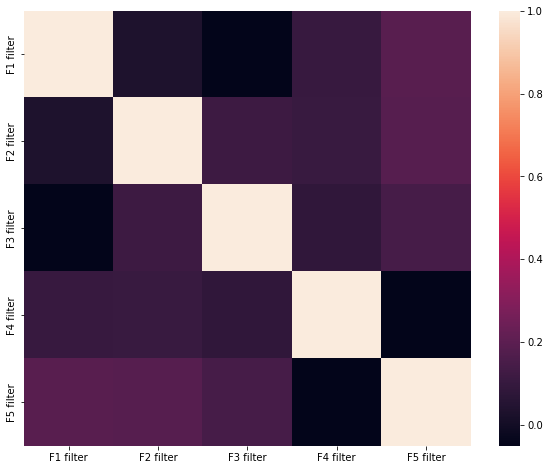

In [ ]:
#trying to understand the correlation between columns.b
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr())

#from plot we can say that the correlation between columns is less than 30%(dark purple colour is seen between different filters)

# Modelling

Supervised Learning (assuming one of the columns as target)

Linear regression (using Standard Scaler as scaling method)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'LinearRegression model scores vs Target column')

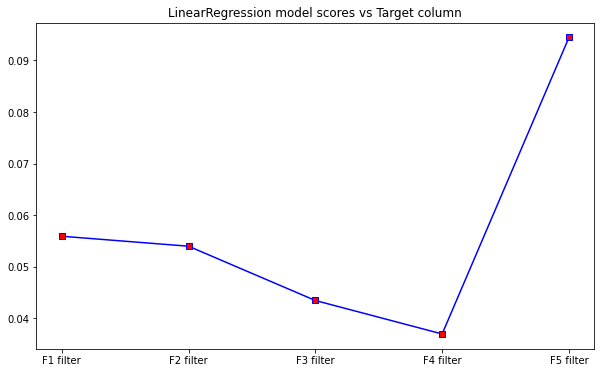

In [ ]:
scores = []
model = LinearRegression()
X=df2

for i in range(5):
    # choosing column
    target = X.columns[i]

    # setting target column
    y = df2[target]

    # applying Standard Scaler to other columns
    cols2scale = df2.columns.drop(target)
    X[cols2scale] = StandardScaler().fit_transform(df2[cols2scale])

    # model and score
    model.fit(X[cols2scale], y)
    scores.append(model.score(X[cols2scale], y))

plt.figure(figsize=(10,6))
plt.plot(X.columns,scores,'bs-',markerfacecolor='red')
plt.title('LinearRegression model scores vs Target column')

Decision Tree Regressor

In [ ]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

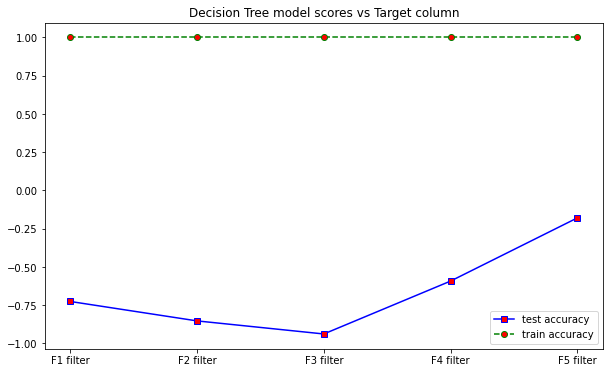

In [ ]:
test_scores = []
train_scores = []
dtree = DecisionTreeRegressor()

for i in range(5):
    # choosing column
    target = df2.columns[i]

    # setting target column
    y = df2[target]

    # applying Standard Scaler to other columns
    cols2scale = df2.columns.drop(target)
    X[cols2scale] = StandardScaler().fit_transform(df2[cols2scale])

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X[cols2scale], y, test_size=0.3, random_state=40)

    # model and score
    dtree.fit(X_train, y_train)
    pred_train = dtree.predict(X_train)
    pred_test = dtree.predict(X_test)

    test_scores.append(r2_score(pred_test,y_test))
    train_scores.append(r2_score(pred_train,y_train))

plt.figure(figsize=(10,6))
plt.plot(X.columns,test_scores,'bs-',X.columns,train_scores,'go--',markerfacecolor='red')
plt.title('Decision Tree model scores vs Target column')
plt.legend(['test accuracy','train accuracy'])

# Unsupervised Learning

# K-Means

#K-means (clustering analysis technique) is chosen because there is no target variable and the data is random and noisy with few clusters being seen.

In [ ]:
#importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df2
scaler = StandardScaler()
#We do not want our algorithm to be affected by the magnitude of these variables. The algorithm should not be biased towards
#variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale using standard scalar
X_std = scaler.fit_transform(X)

In [ ]:
X.shape

(401, 5)

In [ ]:
#3 clusters are chosen
cluster = KMeans(n_clusters=3)
model = cluster.fit(X_std)

In [ ]:
#Silhouette analysis is used to study the separation distance between the resulting clusters.
#The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.
silhouette_score(X_std, model.labels_)

0.16892503064377434

#so we can say that for 3 clusters the clusters are quite overlapped.

In [ ]:
#now lets see the scores for clusters in range (2,50)
scores = []
for n_clus in range(2,50):
    model = KMeans( n_clusters= n_clus).fit(X_std)
    scores.append(silhouette_score(X_std, model.labels_))

Text(0.5, 1.0, 'Scores vs n_clusters')

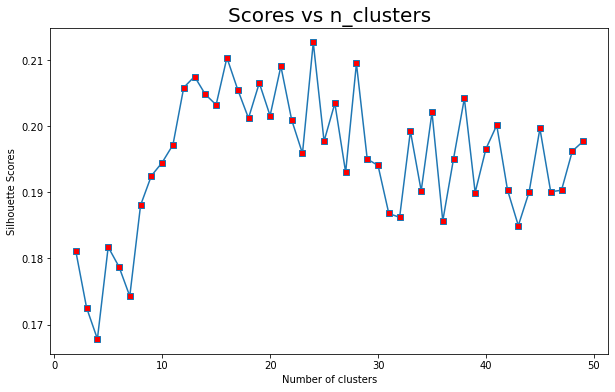

In [ ]:
#figure is plotted for Silhouette Scores vs Number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(2,50),scores,'s-',markerfacecolor='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Scores vs n_clusters', fontdict={'size' : 20})

#we can see that the highest silhoutte score from plot is nearly 0.21 for 15 clusters, which is not a good score.

#so lets use pca(principal component analysis)
#PCA is a tool for identifying the main axes of variance within a data set and allows for easy data exploration to understand the key variables in the data and spot outliers.
#combining Principal Components Analysis (PCA) and K-means Clustering improves segmentation results.


#By doing PCA we are retaining all the important information. If the data exhibits clustering, this will be generally revealed after our PCA analysis: by retaining only the components with the highest variance, the clusters will be likely more visibile (as they are most spread out).

# PCA

In [ ]:
#importing required libraries
from sklearn.decomposition import PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#standardization
scalar = StandardScaler()
segmentation_std = scalar.fit_transform(df2)

In [ ]:
#using pca
pca = PCA()
pca.fit(df2)

PCA()

In [ ]:
print(pca.explained_variance_ratio_)
#this shows how much each variance is explained by each of the seven individual components

[0.27308627 0.21456573 0.2080754  0.17281683 0.13145577]


Text(0, 0.5, 'cumulative explained variance')

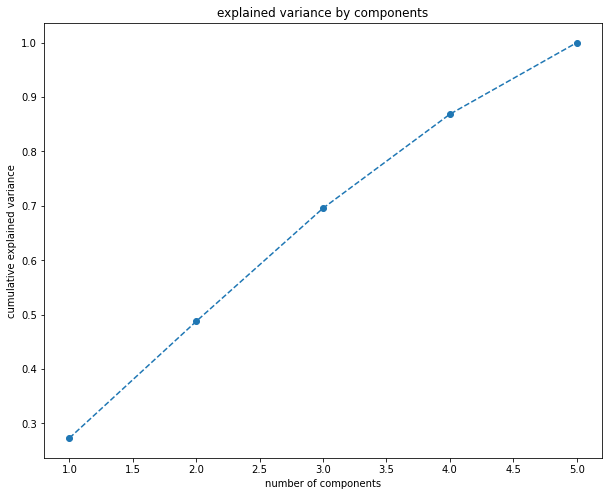

In [ ]:
#we need to decide how many features we’d like to keep based on the cumulative variance plot.
plt.figure(figsize = (10,8))
plt.plot(range(1,6),pca.explained_variance_ratio_.cumsum() , marker ='o',linestyle = '--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

#from graph we can see that there's a lot of variance, lets try to capture nearly 80% of the variance  by taking 3 components

#pca is done for chosen number of components

In [ ]:
pca = PCA(n_components=3)
pca.fit(df2)

PCA(n_components=3)

In [ ]:
pca.transform(df2)

array([[-1.24303691, -1.40645745,  1.40242375],
       [-1.5538069 , -1.43558793, -0.38332052],
       [-2.17149813, -1.43092589, -1.18199124],
       ...,
       [-2.25483721, -1.30971595, -0.2889585 ],
       [-2.01714347, -1.35797753, -0.88096914],
       [-0.88116916, -1.91074994, -0.30656753]])

In [ ]:
#We need only the calculated resulting components scores for the elements in our data set
scores_pca = pca.transform(df2)

#we fit kmeans for the transformed data using PCA

#In any case, it turns out that we ourselves need to determine the number of clusters in a K-means algorithm.
#In order to do so, we run the algorithm with a different number of clusters. Then, we determine the Within Cluster Sum of Squares or WCSS for each solution. Based on the values of the WCSS and an approach known as the Elbow method, we make a decision about how many clusters we’d like to keep.

In [ ]:
wcss=[]
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

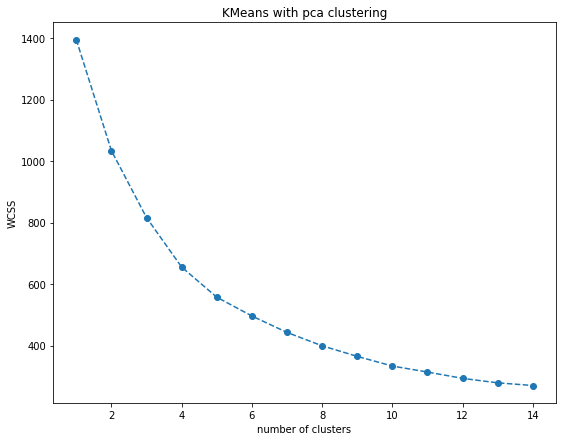

In [ ]:
#plotting WCSS vs number of clusters
plt.figure(figsize = (9,7))
plt.plot(range(1,15),wcss , marker ='o',linestyle = '--')
plt.title('KMeans with pca clustering')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

#from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method.
#The approach consists of looking for a kink or elbow in the WCSS graph.
#Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother.
#In this instance, the kink comes at the 4 clusters mark. So, we’ll be keeping a four-cluster solution.

In [ ]:
#we have chosen three clusters, so we run KMeans for number of clusters equals to four
#same initialiser and random state as before
kmeans_pca = KMeans(n_clusters=4,init='k-means++',random_state=42)



In [ ]:
#we fit our data with kmeans pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

#Here, we used the same initializer and random state as before. Subsequently, we fit the model with the principal component scores.

And now we’ve come to the most interesting part: analyzing the results of our algorithm.

In [ ]:
#we create new dataframe Before all else, we’ll create a new data frame. It allows us to add in the values of the separate
#components to our segmentation data set. The components scores are stored in the ‘scores P C A’ variable. Let’s label them
#Component 1, 2 and 3. In addition, we also append the ‘K means P C A’ labels to the new data frame.
df2_pca_kmeans = pd.concat([df2.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df2_pca_kmeans.columns.values[-3:] =['Component1','Component2','Component3']
#
df2_pca_kmeans['Segment KMeans pca'] =kmeans_pca.labels_

In [ ]:
df2_pca_kmeans.head()

,F1 filter,F2 filter,F3 filter,F4 filter,F5 filter,Component1,Component2,Component3,Segment KMeans pca
0,-1.589508,-0.120827,-0.406219,1.279167,-1.342405,-1.243037,-1.406457,1.402424,1
1,-1.493880,-0.353743,0.369115,-0.708255,-1.342405,-1.553807,-1.435588,-0.383321,0
2,-1.446065,-1.331987,0.981221,-1.643513,-1.530462,-2.171498,-1.430926,-1.181991,0
3,-1.446065,-1.425153,0.369115,0.655662,-1.191960,-1.651745,-1.314218,0.712685,1
4,-1.446065,-0.307160,0.491536,-1.136915,-0.514956,-1.096424,-1.218548,-1.127941,0


#One small step remains: we should add the names of the segments to the labels.     
#We create a new column named ‘Segment’ and map the three clusters directly inside it.

In [ ]:
df2_pca_kmeans['Segment'] = df2_pca_kmeans['Segment KMeans pca'].map({0:'first',1:'second',2:'third',3:'fourth'})

#So, let’s visualize the segments with respect to the first two components.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


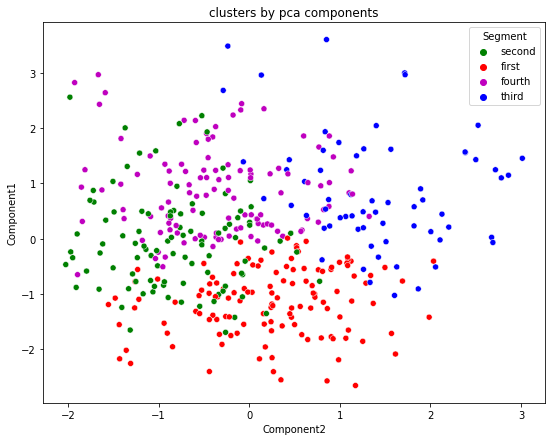

In [ ]:
#plot data by pca components.y axis is 1st component,x-axis is 2nd
plt.figure(figsize=(9,7))
x_axis =  df2_pca_kmeans['Component2']
y_axis = df2_pca_kmeans['Component1']
sns.scatterplot(x_axis,y_axis,hue=df2_pca_kmeans['Segment'],palette=['g','r','m','b'])
plt.title('clusters by pca components')
plt.show()

#as the clusters are seperated well without too muchoverlapping, we can say that the given data is correlated, the overlapping dots are represented by the third component.

#now lets check the silhoutte score for the clusters

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
scores = []
for n_clus in [4,6]:
    kmeans_pca = KMeans(n_clusters=n_clus,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    score = silhouette_score(scores_pca, kmeans_pca.labels_)
    print(f' Score for n_clus = {n_clus} : {score}')
    scores.append(score)


 Score for n_clus = 4 : 0.27279103120330794
 Score for n_clus = 6 : 0.2704717326637085


#silhoutte score is nearly 0.3 which is not a good score, it implies that clusters are not well seperated i.e the data points in a specific cluster are not well matched to its own cluster.

# now lets see the 3-d plot for 3 components

Text(0, 0.5, 'WCSS')

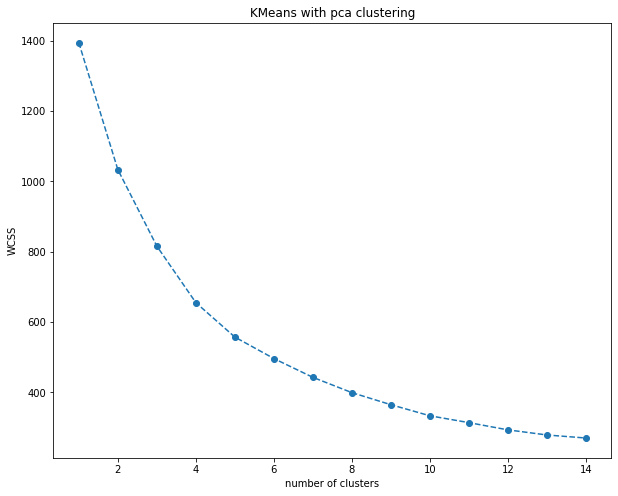

In [ ]:
Xpca3 = PCA(n_components=3).fit_transform(df2)

wcss=[]
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters=i,random_state=42)
    kmeans_pca.fit(Xpca3)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize = (10,8))
plt.plot(range(1,15),wcss , marker ='o',linestyle = '--')
plt.title('KMeans with pca clustering')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

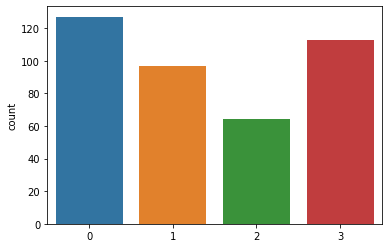

In [ ]:
kmeans_4 = KMeans(n_clusters=4,random_state=42)
clusters = kmeans_4.fit_predict(Xpca3)
sns.countplot(x=clusters)

In [ ]:
import plotly.graph_objs as go

# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Component 1 --->'),yaxis = dict(title  = 'Component 2 --->'),zaxis = dict(title  = 'Component 3 -->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
x = Xpca3
labels = kmeans_4.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

#We can conlcude that the given data is highly noisy and it was difficult to find the relationship between the data points. Using combination of PCA and clustering analysis technique,we were able to find grouping between data points.